**Laboratorio de métodos cuantitativos aplicados a la Gestión**

---


Clase 7- Programación lineal en Python

¿Qué vamos a poder hacer?

🧮 Resolver problemas de optimización organizacional

🧩 Formular modelos para objetivos empresariales e interpretar soluciones óptimas.


In [ ]:
#importamos las librerías que vamos a usar en esta ocasión
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
#!pip install Pulp
import pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 90.6 MB/s eta 0:00:00


**Repaso**:

En cualquier empresa, muchas de las decisiones que se toman tienen por objeto hacer el mejor uso posible (optimización) de los recursos de la misma.
🤔 Por recursos de una empresa entendemos la maquinaria que ésta posea, sus trabajadores, capital financiero, instalaciones y materias primas.  Tales recursos pueden ser usados para fabricar productos o servicios.

**La Programación Lineal es un modelo matemático diseñado para ayudar en la planificación y toma de decisiones referentes a la asignación de los recursos.**

▶ En cada problema de programación lineal se deben tomar decisiones de maximización o minimización de objetivos representados por funciones lineales, las cuales están sujetas a determinadas condiciones llamadas restricciones, que se representan a través de ecuaciones y/o desigualdades también lineales.

Ejemplo: Si una compañía produce cuatro bienes diferentes, la dirección puede usar Programación Lineal para determinar las cantidades de recursos que asigna a la producción de cada uno de ellos (podría optar por hacer una asignación ponderada, dedicar todos los recursos a la producción de un único bien abandonando la producción del resto, etc.).  


En el CBC aprendimos el método Simplex y también un método gráfico. Vamos a ver qué herramientas nos provee este lenguaje de programación para optimizar.

# Linprog

▶La librería Scipy tiene la función Linprog que resuleve problemas de optimización.

Supongamos que queremos minimizar la siguiente función: $2x_1+2x_2$ sujeta a $x_1=x_2/3$ y $x_1+x_2=20$

In [ ]:
#los argumentos esenciales de la función linprog son
c= [2,2] #acá los coeficientes de la función objetivo
A= [[1, -1/3],
    [1,1]] #acá los coeficientes de las restricciones.
b= [0,20]  #acá las constantes de las restricciones
res= linprog(c, A, b)
res

       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00]
                marginals: [ 2.000e+00  2.000e+00]
         upper:  residual: [       inf        inf]
                marginals: [ 0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 0.000e+00  2.000e+01]
                marginals: [-0.000e+00 -0.000e+00]

## Caso 1

Una fábrica produce dos productos, $x_1$ y
$𝑥_2$

La empresa quiere maximizar la cantidad total producida, es decir:

Maximizar
$𝑍=𝑥_1+x_2$

Sin embargo, enfrenta dos restricciones:

Cada producto $x_1$	consume 2 horas de máquina A y cada producto $𝑥_2$ consume 1 hora de máquina A. Solo hay 100 horas disponibles de máquina A.

Cada producto $𝑥_1$ consume 1 hora de máquina B y cada producto $x_2$ consume 1 hora de máquina B. Solo hay 80 horas disponibles de máquina B.

In [ ]:
#queremos maximizar: Z = x1 + x2
#restricciones:
#   2x1 + x2 <= 100  (horas de máquina)
#   x1 + x2 <= 80    (materia prima)
#   x1, x2 >= 0

#linprog minimiza, entonces usamos coef negativos
c = [-1, -1]
A = [[2, 1],
     [1, 1]]
b = [100, 80]

res = linprog(c, A, b, bounds=(0, None))
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -80.0
              x: [ 0.000e+00  8.000e+01]
            nit: 2
          lower:  residual: [ 0.000e+00  8.000e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 2.000e+01  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [ ]:
print("Producción óptima de x1:", res.x[0])
print("Producción óptima de x2:", res.x[1])
print("Producción máxima:", -res.fun)

Producción óptima de x1: 0.0
Producción óptima de x2: 80.0
Producción máxima: 80.0


## Caso 2

Una refinería de petróleo procesa dos tipos de crudo: A y B con la finalidad de producir gas oíl, lubricantes y kerosene. Las demandas de estos
productos son al menos respectivamente 14, 10 y 8 toneladas por día.
El crudo A tiene un rendimiento de 0,2 toneladas de gas oíl, 0,10 toneladas de lubricante y 0,16 toneladas de kerosene por cada tonelada de
petróleo.
Los rendimientos del crudo B son: 0,10 toneladas de gas oíl, 0,20 toneladas de lubricante y 0,10 toneladas de kerosene.


*   Formular el modelo que permita determinar la capacidad mínima de la planta en toneladas por día de crudo a procesar.
*   Determinar gráficamente el espacio de soluciones factibles.
*   Determinar la cantidad de cada crudo a procesar y la capacidad mínima de la planta utilizando el método gráfico.




Es un problema de minimización: queremos procesar lo mínimo de crudo (A y B) cumpliendo demandas mínimas.

Objetivo:
mín   $Z= x_A +x_B$

Variables:
$x_A,x_B \geq 0$ (toneladas por día de crudo A y B.)

Restricciones:

$0.2x_A+0.1x_B \geq 14 \\
0.1x_A+ +0.2x_B \geq 10\\
0.16x_A+0.1x_B \geq 8$


In [ ]:
# Min Z = xA + xB
c = [1, 1]

#pasamos >= a <= multiplicando por -1
A = [
    [-0.20, -0.10],
    [-0.10, -0.20],
    [-0.16, -0.10],
]
b = [-14, -10, -8]

res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="highs")
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 80.0
              x: [ 6.000e+01  2.000e+01]
            nit: 2
          lower:  residual: [ 6.000e+01  2.000e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  3.600e+00]
                 marginals: [-3.333e+00 -3.333e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [ ]:
print("Éxito:", res.success)
print(f"xA óptimo: {res.x[0]:.2f} t/día")
print(f"xB óptimo: {res.x[1]:.2f} t/día")
print(f"Procesamiento mínimo (xA + xB): {res.fun:.2f} t/día")

Éxito: True
xA óptimo: 60.00 t/día
xB óptimo: 20.00 t/día
Procesamiento mínimo (xA + xB): 80.00 t/día


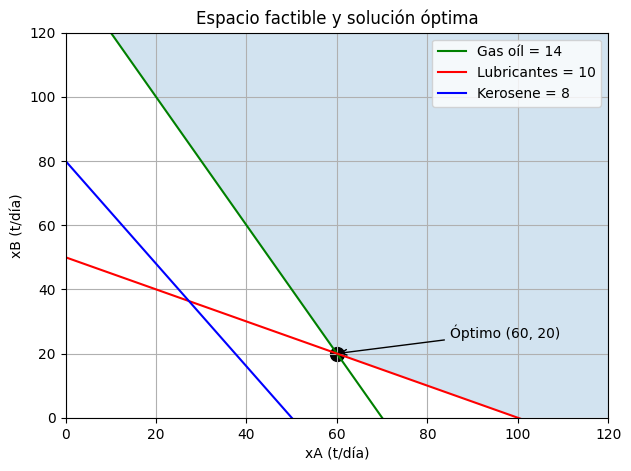

In [ ]:
#rectas de las restricciones (en igualdad)
xA = np.linspace(0, 120, 400)
r1 = (14 - 0.20*xA)/0.10       # 0.20xA + 0.10xB = 14
r2 = (10 - 0.10*xA)/0.20       # 0.10xA + 0.20xB = 10
r3 = (8  - 0.16*xA)/0.10       # 0.16xA + 0.10xB = 8

#región factible: por encima de cada recta y xB>=0
xB_min = np.maximum.reduce([r1, r2, r3, np.zeros_like(xA)])

#graficamos las rectas
plt.figure(figsize=(7,5))
plt.plot(xA, r1, label='Gas oíl = 14', color='green')
plt.plot(xA, r2, label='Lubricantes = 10', color='red')
plt.plot(xA, r3, label='Kerosene = 8',color='blue')

#sombreamos región factible (donde xB >= xB_min y xB >= 0)
plt.fill_between(xA, xB_min, 200, alpha=0.2)

#punto óptimo
plt.scatter([60],[20], s=100,color='black')
plt.annotate("Óptimo (60, 20)", (60,20), xytext=(85,25), arrowprops=dict(arrowstyle="->"))

plt.xlim(0,120); plt.ylim(0,120)
plt.xlabel("xA (t/día)"); plt.ylabel("xB (t/día)")
plt.title("Espacio factible y solución óptima")
plt.legend(); plt.grid(True)
plt.show()


# Pulp

Una alternativa más flexible es la librería PuLP, que permite formular modelos de optimización de manera más clara (con nombres de variables y restricciones) y resolverlos con distintos solvers.

Supongamos que queremos maximizar $3x+5y$ sujeta a $x+2y\leq10$ y $2x+y\leq12$

In [ ]:
#definimos el problema
prob = pulp.LpProblem("Problema", pulp.LpMaximize)

#definimos las variables de elección
x = pulp.LpVariable('x')
y = pulp.LpVariable('y')

#definimos la función objetivo
prob += 3*x + 5*y, "Z" #fijense que adicionamos algo a prob

#adicionamos las restricciones
prob += x + 2*y <= 10
prob += 2*x + y <= 12

#usamos la función solve
prob.solve() #la salida de esto va a ser 1 si se encuentra algún óptimo



1

In [ ]:
#resultados
print("Estado:", pulp.LpStatus[prob.status])
print("Valor óptimo de x:", x.varValue)
print("Valor óptimo de y:", y.varValue)
print("Valor de la función objetivo Z:", pulp.value(prob.objective))


Estado: Optimal
Valor óptimo de x: 4.6666667
Valor óptimo de y: 2.6666667
Valor de la función objetivo Z: 27.333333600000003


## Caso 3

Una fábrica de equipos electrónicos construye amplificadores y altoparlantes. Debido a su capacidad puede construir hasta 100 unidades diarias en total. Una convención le obliga a exportar a otras provincias la mitad de los amplificadores que fabrica y la tercera parte de los altoparlantes, pero por un problema de transporte no puede exportar más de 40 unidades por día. Cada amplificador deja un beneficio de 50 pesos y cada altoparlante deja 60 pesos.
* Plantear las restricciones y la función objetivo.  
* Determinar qué producción de amplificadores y de altoparlantes maximiza el beneficio.
* Graficar el modelo indicando el conjunto de soluciones factibles.

Vamos a maximizar la función de beneficio $Z= 50x +60y$ sujeta a
* $x+y \leq 100$ (capacidad)
* $\frac{1}{2}x+\frac{1}{3}y\leq40$ (exportación)
* $x\geq0,y\geq0$

In [ ]:
#definimos el problema
prob = pulp.LpProblem("Caso 3", pulp.LpMaximize)

#definimos las variables de elección
x = pulp.LpVariable('x')
y = pulp.LpVariable('y')

#definimos la función objetivo
prob += 50*x + 60*y, "Z"

#adicionamos las restricciones
prob += x + y <= 100
prob += 0.5*x + 1/3*y <= 40
prob += x>=0
prob += y>=0

#resolvemos
prob.solve()
print(f'el beneficio máximo alcanzado es {pulp.value(prob.objective)} cuando se fabrican {x.varValue} amplificadores y {y.varValue} altoparlantes')


el beneficio máximo alcanzado es 6000.0 cuando se fabrican 0.0 amplificadores y 100.0 altoparlantes


/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Vamos a visualizar la solución de esquina a la que hemos llegado en el gráfico del tercer inciso:

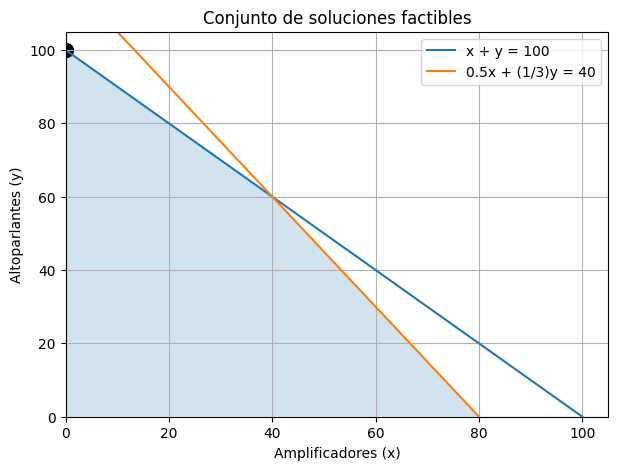

In [ ]:
#rectas de frontera
x = np.linspace(0, 100, 400)
y_cap = 100 - x                       # x + y = 100
y_exp = 120 - 1.5*x                   # 0.5x + (1/3)y = 40  => y = 120 - 1.5x

#región factible: por debajo de ambas y en el 1er cuadrante
y_factible = np.minimum(y_cap, y_exp)
y_factible = np.maximum(y_factible, 0)

plt.figure(figsize=(7,5))
plt.plot(x, y_cap, label='x + y = 100')
plt.plot(x, y_exp, label='0.5x + (1/3)y = 40')

#sombreado
plt.fill_between(x, 0, y_factible, alpha=0.2)

#punto óptimo
plt.scatter([0],[100], s=100,color='black')

plt.xlim(0, 105); plt.ylim(0, 105)
plt.xlabel('Amplificadores (x)')
plt.ylabel('Altoparlantes (y)')
plt.title('Conjunto de soluciones factibles')
plt.legend(); plt.grid(True)
plt.show()


## Caso 4

Vamos a adicionar variables de elección y restricciones.

Una empresa agrícola produce trigo (x1), maíz (x2), soja (x3) y girasol (x4).
Dispone de tres recursos limitados:

* Tierra cultivable: 600 hectáreas.

* Agua para riego: 1.200 m³.

* Horas de trabajo: 1.000 horas

Cada cultivo requiere:


| Cultivo     | Tierra (ha) | Agua (m³) | Trabajo (h) | Beneficio (\$/unidad) |
| ----------- | ----------- | --------- | ----------- | --------------------- |
| Trigo (x1)  | 5           | 4         | 3           | 40                    |
| Maíz (x2)   | 3           | 2         | 5           | 50                    |
| Soja (x3)   | 2           | 5         | 2           | 60                    |
| Girasol(x4) | 5           | 3         | 4           | 55                    |


Restricciones:

El uso total de tierra no puede superar las 600 ha.

El uso total de agua no puede superar los 1.200 m³.

El trabajo total no puede superar las 1.000 h.


Tenemos que maximizar el beneficio $Z=40x_1+50x_2+60x_3+55x_4$ sujeto a

$5x_1 + 3x_2 + 2x_3 + 5x_4 \leq 600\\
4x_1 + 2x_2 + 5x_3 + 3x_4 \leq 1200\\
3x_1 + 5x_2 + 2x_3 + 4x_4 \leq 1000$

In [ ]:
prob = pulp.LpProblem("Problema agro", pulp.LpMaximize)

#variables
x1 = pulp.LpVariable("Trigo", lowBound=0)
x2 = pulp.LpVariable("Maiz", lowBound=0)
x3 = pulp.LpVariable("Soja", lowBound=0)
x4 = pulp.LpVariable("Girasol", lowBound=0)

#función objetivo
prob += 40*x1 + 50*x2 + 60*x3 + 55*x4

#restricciones
prob += 5*x1 + 3*x2 + 2*x3 + 5*x4 <= 600
prob += 4*x1 + 2*x2 + 5*x3 + 3*x4 <= 1200
prob += 3*x1 + 5*x2 + 2*x3 + 4*x4 <= 1000

#resolver
prob.solve()

#resultados
print("Producción óptima:")
for v in prob.variables():
    print(f"{v.name} = {v.varValue}")
print("Beneficio máximo =", pulp.value(prob.objective))


Producción óptima:
Girasol = 0.0
Maiz = 54.545455
Soja = 218.18182
Trigo = 0.0
Beneficio máximo = 15818.18195


# 🥇 ⚡ 🤓 Mini graficadora del espacio factible

¿Cuántas restricciones vas a ingresar? 2
Restricción 1 (formato: a b c tipo) 
Ejemplo: 2 1 10 <= significa 2x + 1y <= 10
2 1 80 <=
Restricción 2 (formato: a b c tipo) 
Ejemplo: 2 1 10 <= significa 2x + 1y <= 10
3 1 100 <=


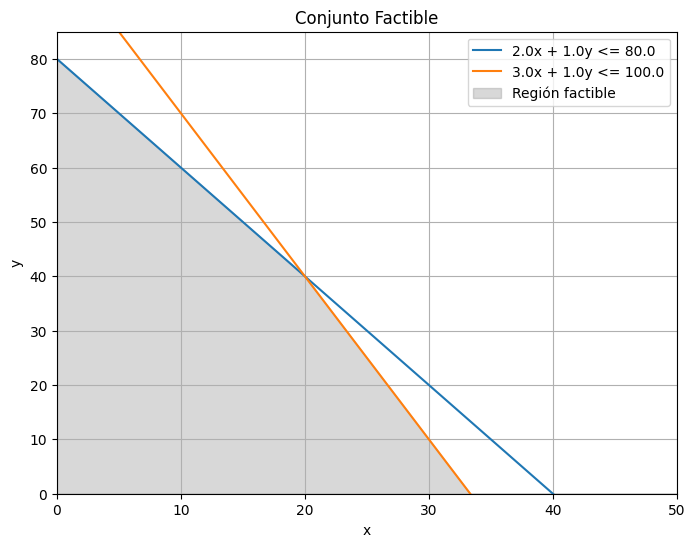

In [ ]:
#pedimos número de restricciones
n = int(input("¿Cuántas restricciones vas a ingresar? "))

restricciones = []
for i in range(n):
    print(f"Restricción {i+1} (formato: a b c tipo) ")
    print("Ejemplo: 2 1 10 <= significa 2x + 1y <= 10")
    a, b, c, tipo = input().split()
    restricciones.append((float(a), float(b), float(c), tipo))
#definimos rango de x
x = np.linspace(0, 50, 400)

plt.figure(figsize=(8,6))

y_todas = []

for (a, b, c, tipo) in restricciones:
    if b != 0:
        y = (c - a*x)/b  # despejamos y
        y_todas.append((y, tipo))
        plt.plot(x, y, label=f"{a}x + {b}y {tipo} {c}")
    else:
        # caso x <= c/a o x >= c/a
        x_val = c/a
        plt.axvline(x_val, label=f"{a}x {tipo} {c}", color='red')

#región factible
y_factible = np.full_like(x, np.inf)

for (y, tipo) in y_todas:
    if tipo == "<=":
        y_factible = np.minimum(y_factible, y)
    elif tipo == ">=":
        y_factible = np.maximum(y_factible, y)

#nos aseguramos de que no sea negativa
y_factible = np.maximum(y_factible, 0)

plt.fill_between(x, 0, y_factible, color="gray", alpha=0.3, label="Región factible")

plt.xlim(0, max(x))
plt.ylim(0, max(y_factible[np.isfinite(y_factible)])+5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto Factible")
plt.legend()
plt.grid(True)
plt.show()


# Comparemos Pulp y Linprog

## 📊 Comparación entre `linprog` (SciPy) y `PuLP`

| Aspecto | `linprog` (SciPy) | `PuLP` |
|---------|------------------|--------|
| **Enfoque** | Pensado para **resolver rápido** problemas de optimización. | Pensado para **formular modelos de forma clara** y cercana a la notación matemática. |
| **Forma de uso** | Siempre **minimiza**, por lo que para maximizar hay que invertir el signo de la función objetivo. | Permite elegir **Maximize** o **Minimize** explícitamente. |
| **Sintaxis** | Se trabaja con **listas/matrices** de coeficientes (más algebraico, menos intuitivo para principiantes). | Se trabaja con **objetos y restricciones declaradas** (más legible y didáctico). |
| **Interpretación de resultados** | Retorna un objeto con atributos (ej. `res.x`, `res.fun`). | Las variables tienen valores asignados directamente (ej. `x.value()`). |



-Actividad propuesta:
Una panadería produce pan y medialunas,
Un pan requiere 1 hora de horno y 0.5h de mano de obra, una medialuna requiere 2 horas de horno y 1h de mano de obra. Disponibilidad: 160 horas de horno, 90h de mano de obra. Ganancias: 50 pesos el pan, 80 pesos la medialuna.
* Encontrar el beneficio máximo.
* Formular otro problema de optimización para una panadería que produce pan y medialunas y resolverlo, incluyendo un gráfico del conjunto de soluciones factibles.


Fuentes:

Notas de álgebra teórico-prácticas: cátedra de Álgebra / Alicia Delia Fraquelli;Andrea Leonor Gache. - 1a ed. - Ciudad Autónoma de Buenos Aires: Universidad de Buenos Aires. Facultad de Ciencias Económicas, 2019.

Hilpisch, Y. (2018). Python for Finance: Mastering Data-Driven Finance (2nd ed.). O’Reilly Media.

James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An Introduction to Statistical Learning: with Applications in Python. Springer.